# Quiz SCIE6062001-Computational Biology LAB
##### Timothy Theophilus Hartono - 2540129546

In [1]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils import nt_search as nt
from Bio.SeqUtils import MeltingTemp as mt
from Bio.SeqUtils import molecular_weight as mw
from collections import Counter
from matplotlib import pyplot as plt
from Bio.SeqUtils import seq3
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Levenshtein import distance

In [2]:
content_seqA = SeqIO.read('./AY893111.fasta', 'fasta')
content_seqB = SeqIO.read('./EE001249.fasta', 'fasta')

seqA = content_seqA.seq
seqB = content_seqB.seq

1 Sequence Manipulation:

In [3]:
# A. Find and display the total length of Sequence A and B
print('Sequence A:', seqA)
print('Sequence B:', seqB)
print('Total length of Sequence A:', len(seqA))
print('Total length of Sequence B:', len(seqB))

Sequence A: ATGGGGAAGATGGCAGCGGCCGTGGGCTCTGTGGCGACTCTGGCGACTGAGCCCGGGGAGGACGCCTTTCGGAAACTTTTCCGCTTCTACCGTCAGAGCCGGCCCGGGACCGCAGACCTGGAAGGGGTCATCGACTTCTCGGCGGCCCACGCAGCCCGTGGCAAGGGTCCTGGTGCCCAAAAGGTGATCAAATCTCAGCTAAATGTGTCTTCTGTCAGTGAGCAGAATGCATATAGAGCAGGTCTTCAGCCCGTCAGCAAGTGGCAAGCCTATGGACTCAAAGGCTATCCTGGGTTTATTTTTATCCCAAACCCCTTCCTCCCAGGTTACCAGTGGCACTGGGTGAAACAGTGCCTTAAGTTATATTCCCAGAAACCTAATGTATGTAACCTGGACAAACACATGTCTAAAGAAGAGACCCAAGATCTGTGGGAACAGAGCAAAGAGTTCCTGAGGTATAAAGAAGCGACTAAACGGAGACCCCGAAGTTTACTGGAGAAACTGCGTTGGGTGACCGTAGGCTACCATTATAACTGGGACAGTAAGAAATACTCAGCAGATCATTACACACCTTTCCCTTCTGACCTGGGTTTCCTCTCAGAGCAAGTAGCCGCTGCCTGTGGATTTGAGGATTTCCGAGCTGAAGCAGGGATCCTGAATTACTACCGCCTGGACTCCACACTGGGAATCCACGTAGACAGATCTGAGCTAGATCACTCCAAACCCTTGCTGTCATTCAGCTTTGGACAGTCCGCCATCTTTCTCCTGGGTGGTCTTCAAAGGGATGAGGCCCCCACGGCCATGTTTATGCACAGTGGTGACATCATGATAATGTCGGGTTTCAGCCGCCTCTTGAACCACGCAGTCCCTCGTGTCCTTCCAAATCCAGAAGGGGAAGGCCTGCCTCACTGCCTAGAGGCACCTCTCCCTGCTGTCCTCCCGAGAGATTCAATGGTAGAGCCTTGTTCTATGGAGGACTGGCAGGTGT

In [4]:
# B Find and display the first time the codon (TGT) appears in Sequence A and B
print('First time the codon (GTG) appears [index]: ', seqA.find('TGT'))
print('First time the codon (GTG) appears [index]: ',seqB.find('TGT'))

First time the codon (GTG) appears [index]:  29
First time the codon (GTG) appears [index]:  79


In [5]:
# C Take the last 15 nucleotides from Sequence A and the first 30 nucleotide from Sequence B then combine the sequences and reverse it to a new seqeuence, Sequence C
seqC = seqA[-15:] + seqB[:30]
seqC = seqC[::-1]
print('Sequence C:', seqC)

Sequence C: TTTTTTTTTTTTTTTCCCGCCGGCGAGATCGTTCGACACTCCCAA


2. Sequence Analysis & Plotting

In [6]:
# A Determine and display the melting temperature for Sequence A, B, and C (using built-in Wallace Method)
mtA = mt.Tm_Wallace(seqA)
mtB = mt.Tm_Wallace(seqB)
mtC = mt.Tm_Wallace(seqC)

print('Melting temperature seqA:', mtA)
print('Melting temperature seqB:', mtB)
print('Melting temperature seqC:', mtC)

Melting temperature seqA: 3568.0
Melting temperature seqB: 1508.0
Melting temperature seqC: 130.0


In [7]:
# B Determine and display the GC & AT content percentage for Sequence A, B, and C
def gc_content(seq):
    result = float(seq.count('G') + seq.count('C')) / len(seq)
    return result * 100

def at_content(seq):
    result = float(seq.count('A') + seq.count('T')) / len(seq)
    return result * 100

GC_A = gc_content(seqA)
GC_B = gc_content(seqB)
GC_C = gc_content(seqC)

AT_A = at_content(seqA)
AT_B = at_content(seqB)
AT_C = at_content(seqC)

print('GC Content percentage Seq A:', GC_A)
print('GC Content percentage Seq B:', GC_B)
print('GC Content percentage Seq C:', GC_C)

print('AT Content percentage Seq A:', AT_A)
print('AT Content percentage Seq B:', AT_B)
print('AT Content percentage Seq C:', AT_C)

GC Content percentage Seq A: 52.478632478632484
GC Content percentage Seq B: 45.0
GC Content percentage Seq C: 44.44444444444444
AT Content percentage Seq A: 47.521367521367516
AT Content percentage Seq B: 55.00000000000001
AT Content percentage Seq C: 55.55555555555556


In [8]:
# C Determine and display the molecular weight for Sequence A, B, C
mwA = mw(seqA)
mwB = mw(seqB)
mwC = mw(seqC)

print('Molecular Weight SeqA:', mwA)
print('Molecular Weight SeqB:', mwB)
print('Molecular Weight SeqC:', mwC)

Molecular Weight SeqA: 361484.27220000175
Molecular Weight SeqB: 160914.6329999998
Molecular Weight SeqC: 13740.729799999997


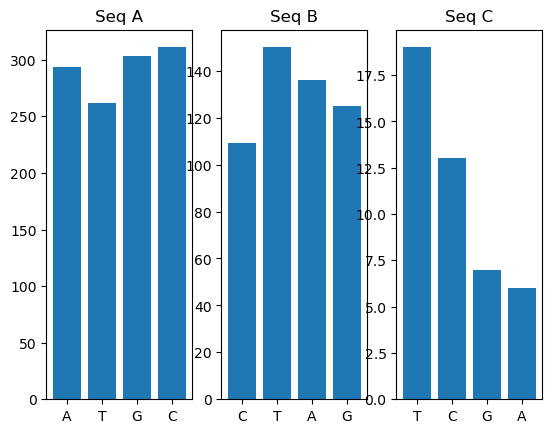

In [9]:
# D Determine and display the nucleotide base (A, C, G, T) frequency for Sequence A, B, and C with a chart using matplotlib library
nbA = Counter(seqA)
nbB = Counter(seqB)
nbC = Counter(seqC)

plt.subplot(1, 3, 1)
plt.bar(nbA.keys(), nbA.values())
plt.title('Seq A')
plt.subplot(1, 3, 2)
plt.bar(nbB.keys(), nbB.values())
plt.title('Seq B')
plt.subplot(1, 3, 3)
plt.bar(nbC.keys(), nbC.values())
plt.title('Seq C')
plt.show()

3. DNA & mRNA Protein Synthesis

In [10]:
# A Transcribe and display the DNA Sequence A, B and C into mRNA Sequence
mRNAa = seqA.transcribe()
mRNAb = seqB.transcribe()
mRNAc = seqC.transcribe()

print('mRNA seqA:', mRNAa)
print('mRNA seqB:', mRNAb)
print('mRNA seqC:', mRNAc)

mRNA seqA: AUGGGGAAGAUGGCAGCGGCCGUGGGCUCUGUGGCGACUCUGGCGACUGAGCCCGGGGAGGACGCCUUUCGGAAACUUUUCCGCUUCUACCGUCAGAGCCGGCCCGGGACCGCAGACCUGGAAGGGGUCAUCGACUUCUCGGCGGCCCACGCAGCCCGUGGCAAGGGUCCUGGUGCCCAAAAGGUGAUCAAAUCUCAGCUAAAUGUGUCUUCUGUCAGUGAGCAGAAUGCAUAUAGAGCAGGUCUUCAGCCCGUCAGCAAGUGGCAAGCCUAUGGACUCAAAGGCUAUCCUGGGUUUAUUUUUAUCCCAAACCCCUUCCUCCCAGGUUACCAGUGGCACUGGGUGAAACAGUGCCUUAAGUUAUAUUCCCAGAAACCUAAUGUAUGUAACCUGGACAAACACAUGUCUAAAGAAGAGACCCAAGAUCUGUGGGAACAGAGCAAAGAGUUCCUGAGGUAUAAAGAAGCGACUAAACGGAGACCCCGAAGUUUACUGGAGAAACUGCGUUGGGUGACCGUAGGCUACCAUUAUAACUGGGACAGUAAGAAAUACUCAGCAGAUCAUUACACACCUUUCCCUUCUGACCUGGGUUUCCUCUCAGAGCAAGUAGCCGCUGCCUGUGGAUUUGAGGAUUUCCGAGCUGAAGCAGGGAUCCUGAAUUACUACCGCCUGGACUCCACACUGGGAAUCCACGUAGACAGAUCUGAGCUAGAUCACUCCAAACCCUUGCUGUCAUUCAGCUUUGGACAGUCCGCCAUCUUUCUCCUGGGUGGUCUUCAAAGGGAUGAGGCCCCCACGGCCAUGUUUAUGCACAGUGGUGACAUCAUGAUAAUGUCGGGUUUCAGCCGCCUCUUGAACCACGCAGUCCCUCGUGUCCUUCCAAAUCCAGAAGGGGAAGGCCUGCCUCACUGCCUAGAGGCACCUCUCCCUGCUGUCCUCCCGAGAGAUUCAAUGGUAGAGCCUUGUUCUAUGGAGGACUGGCAGGUGUG

In [11]:
# B Translate and display the mRNA Sequence A, B, and C into amino acids Sequence
aminoAcidA = mRNAa.translate()
aminoAcidB = mRNAb.translate()
aminoAcidC = mRNAc.translate()

print('Amino acids SeqA:', aminoAcidA)
print('Amino acids SeqB:', aminoAcidB)
print('Amino acids SeqC:', aminoAcidC)

print('Amino acids SeqA using seq3:', seq3(aminoAcidA))
print('Amino acids SeqB using seq3:', seq3(aminoAcidB))
print('Amino acids SeqC using seq3:', seq3(aminoAcidC))

Amino acids SeqA: MGKMAAAVGSVATLATEPGEDAFRKLFRFYRQSRPGTADLEGVIDFSAAHAARGKGPGAQKVIKSQLNVSSVSEQNAYRAGLQPVSKWQAYGLKGYPGFIFIPNPFLPGYQWHWVKQCLKLYSQKPNVCNLDKHMSKEETQDLWEQSKEFLRYKEATKRRPRSLLEKLRWVTVGYHYNWDSKKYSADHYTPFPSDLGFLSEQVAAACGFEDFRAEAGILNYYRLDSTLGIHVDRSELDHSKPLLSFSFGQSAIFLLGGLQRDEAPTAMFMHSGDIMIMSGFSRLLNHAVPRVLPNPEGEGLPHCLEAPLPAVLPRDSMVEPCSMEDWQVCASYLKTARVNMTVRQVLATDQNFPLEPIEDEKRDISTEGFCHLDDQNSEVKRARINPHSL
Amino acids SeqB: LERPPFFFFFFYIIILFFIIFQPNHKMCFFFKVGKQN*AIYFLPALAAALVTLPALSTFSTDLMTPTATV*RMSRTAKRPRGG*SV*ASTHMGLEGIILTMAESPDLTNLGVASKDLPERLSIFSINSANLQAM*AV*QSKTGA*PAPI*PGWFKIMT*AVKEPASLAGSFLE
Amino acids SeqC: FFFFFPAGEIVRHSQ
Amino acids SeqA using seq3: MetGlyLysMetAlaAlaAlaValGlySerValAlaThrLeuAlaThrGluProGlyGluAspAlaPheArgLysLeuPheArgPheTyrArgGlnSerArgProGlyThrAlaAspLeuGluGlyValIleAspPheSerAlaAlaHisAlaAlaArgGlyLysGlyProGlyAlaGlnLysValIleLysSerGlnLeuAsnValSerSerValSerGluGlnAsnAlaTyrArgAlaGlyLeuGlnProValSerLysTrpGlnAlaTyrGlyLeuLysGlyTyrProGlyPheIlePheIleProAsnProPheLeuProGlyTyrGlnTrp

c:\Anaconda3\envs\comp_bio\lib\site-packages\Bio\Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


4. Sequence Alignment & Similarities

In [12]:
# A Perform local alignment pairwise between Sequence A and Sequence “GTCGTCGATCGATCGATCGAT” and display the alignments score
findA = Seq('GTCGTCGATCGATCGATCGAT')
localA = pairwise2.align.localxx(seqA, findA, one_alignment_only=True)
print(format_alignment(*localA[0]))

1106 GTTTCTGCCATCTGGATGACCAGAATAGCGAAGTAAAACGGGCCAGGATAAACCCTCACAGCTT
     |  || |   ||  |||   | | ||  || | |         |  |            |   |
   1 G--TC-G---TC--GAT---C-G-AT--CG-A-T---------C--G------------A---T
  Score=21



In [13]:
# B Perform local alignment pairwise between Sequence B and Sequence “GCTGATCGATGGTGGCT” and display the alignments score# B
findB = Seq('GCTGATCGATGGTGGCT')
localB = pairwise2.align.localxx(seqB, findB, one_alignment_only=True)
print(format_alignment(*localB[0]))

449 GACCGGGGTGGTTCAAGATAATGACTTGAGCGGTGAAGGAACCGGCTTCCTTGGCGGGGTCGTTCTTGGAGT
    |  |        |   |   ||  |  ||    |         ||      |      |  |  |      |
  1 G--C--------T---G---AT--C--GA----T---------GG------T------G--G--C------T
  Score=17



In [14]:
# C Find and Display the levenshtein distance between Sequence A and B
levenshteinDistance = distance(seqA, seqB)
print('Levenshtein distance (seqA and seqB):', levenshteinDistance)

Levenshtein distance (seqA and seqB): 726
